In [133]:
import matplotlib.pyplot as plt
#import matplotlib.mpl_toolkits.axes_grid.axes_grid as AxesGrid
import yt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys  
sys.path.insert(0, 'SelectWarpXTools/PostProcessing/')
from read_raw_data import read_data
import matplotlib.gridspec as gridspec
path = "../Exec/ppc0000"
#path = "../Exec/ppc_init0"
#path = "../Exec/cntfet0000"

In [134]:
ds = yt.load(path)
ds.print_stats()
ds.field_list
print(ds.domain_width.in_units("meter"))

yt : [INFO     ] 2022-10-14 14:57:57,821 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-10-14 14:57:57,822 Parameters: domain_dimensions         = [160 160  40]
yt : [INFO     ] 2022-10-14 14:57:57,823 Parameters: domain_left_edge          = [-0.1   -0.1   -0.025]
yt : [INFO     ] 2022-10-14 14:57:57,824 Parameters: domain_right_edge         = [0.1   0.1   0.025]


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     4	       1024000	           101
----------------------------------------------
   	     4	       1024000


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 4.051e-28 Mpc Mpc
	Width: 4.051e-22 pc pc
	Width: 8.356e-17 AU AU
	Width: 1.250e-03 cm cm
[0.002  0.002  0.0005] m


In [135]:
ncells = yt.load(path).domain_dimensions
print('ncells',ncells)

# Load all data saved in a given path
data = read_data(path)
#print(data)
print(data[0].keys())

print('ncells',ncells)
# Set the number of dimensions automatically (2D or 3D)
dim = 2 if (ncells[2] == 1) else 3

print('dim',dim)

yt : [INFO     ] 2022-10-14 14:57:57,933 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-10-14 14:57:57,934 Parameters: domain_dimensions         = [160 160  40]
yt : [INFO     ] 2022-10-14 14:57:57,935 Parameters: domain_left_edge          = [-0.1   -0.1   -0.025]
yt : [INFO     ] 2022-10-14 14:57:57,936 Parameters: domain_right_edge         = [0.1   0.1   0.025]


ncells [160 160  40]
dict_keys(['Flux_z', 'epsilon', 'Flux_y', 'robinF', 'robinA', 'robinB', 'phi', 'Flux_x'])
ncells [160 160  40]
dim 3


In [136]:
def evaluate_extent(my_field):
    ncells = yt.load(path).domain_dimensions
    print('ncells',ncells)
    xdir=0
    ydir=1
    zdir=2
    a=0
    b=1
    
    my_field_Z = my_field[:,:,1]
    left_edge_x  = 0            - (my_field_Z.shape[a] - ncells[xdir]) // 2
    right_edge_x = ncells[xdir] + (my_field_Z.shape[a] - ncells[xdir]) // 2
    left_edge_y  = 0            - (my_field_Z.shape[b] - ncells[ydir]) // 2
    right_edge_y = ncells[ydir] + (my_field_Z.shape[b] - ncells[ydir]) // 2
    
    extent_Z = np.array([ left_edge_y, right_edge_y, left_edge_x, right_edge_x])
    
    
    my_field_Y = my_field[:,1,:]
    left_edge_x  = 0            - (my_field_Y.shape[a] - ncells[xdir]) // 2
    right_edge_x = ncells[xdir] + (my_field_Y.shape[a] - ncells[xdir]) // 2
    left_edge_z  = 0            - (my_field_Y.shape[b] - ncells[zdir]) // 2
    right_edge_z = ncells[zdir] + (my_field_Y.shape[b] - ncells[zdir]) // 2
    
    extent_Y = np.array([ left_edge_z, right_edge_z,left_edge_x, right_edge_x])

    
    my_field_X = my_field[1,:,:]
    left_edge_y  = 0            - (my_field_X.shape[a] - ncells[ydir]) // 2
    right_edge_y = ncells[ydir] + (my_field_X.shape[a] - ncells[ydir]) // 2
    left_edge_z  = 0            - (my_field_X.shape[b] - ncells[zdir]) // 2
    right_edge_z = ncells[zdir] + (my_field_X.shape[b] - ncells[zdir]) // 2
    
    extent_X = np.array([left_edge_z, right_edge_z, left_edge_y, right_edge_y])
    
    return (extent_X, extent_Y, extent_Z) 

In [137]:
def plot_robin(title, title_height, hor_label, ver_label, robinA_slice, robinB_slice, robinF_slice, extent):
   
    fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12, 12), ncols=3)
    im1 = ax1.imshow(robinA_slice,cmap ='gray',vmin=robinA_slice.min(), vmax=robinA_slice.max(),extent=extent)
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="15%", pad=0.1)
    plt.colorbar(im1, cax=cax)
    ax1.set_xlabel(hor_label, fontsize=25)
    ax1.set_ylabel(ver_label, fontsize=25)
    ax1.set_title('robin A', fontsize=25)

    im2 = ax2.imshow(robinB_slice,cmap ='gray',vmin=robinB_slice.min(), vmax=robinB_slice.max(),extent=extent)
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="15%", pad=0.1)
    plt.colorbar(im2, cax=cax)
    ax2.set_xlabel(hor_label, fontsize=25)
    ax2.set_ylabel(ver_label, fontsize=25)
    ax2.set_title('robin B', fontsize=25)

    im3 = ax3.imshow(robinF_slice,cmap ='gray',vmin=robinF_slice.min(), vmax=robinF_slice.max(),extent=extent)
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes("right", size="15%", pad=0.1)
    plt.colorbar(im3, cax=cax)
    ax3.set_xlabel(hor_label, fontsize=20)
    ax3.set_ylabel(ver_label, fontsize=20)
    ax3.set_title('robin F', fontsize=22)
    fig.tight_layout()
    fig.suptitle(title,y=title_height,fontsize=22)
    #plt.subplots_adjust(bottom=0.1)
    plt.show()

In [138]:
my_field=data[0]['robinA']
extent_X, extent_Y, extent_Z = evaluate_extent(my_field)
print('extent_X',extent_X)
print('extent_Y',extent_Y)
print('extent_Z',extent_Z)

yt : [INFO     ] 2022-10-14 14:57:58,034 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-10-14 14:57:58,035 Parameters: domain_dimensions         = [160 160  40]
yt : [INFO     ] 2022-10-14 14:57:58,036 Parameters: domain_left_edge          = [-0.1   -0.1   -0.025]
yt : [INFO     ] 2022-10-14 14:57:58,037 Parameters: domain_right_edge         = [0.1   0.1   0.025]


ncells [160 160  40]
extent_X [ -1  41  -1 161]
extent_Y [ -1  41  -1 161]
extent_Z [ -1 161  -1 161]


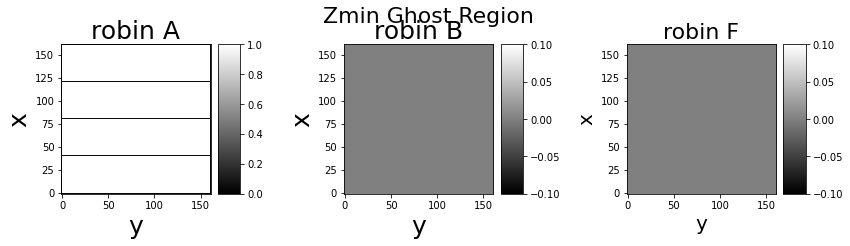

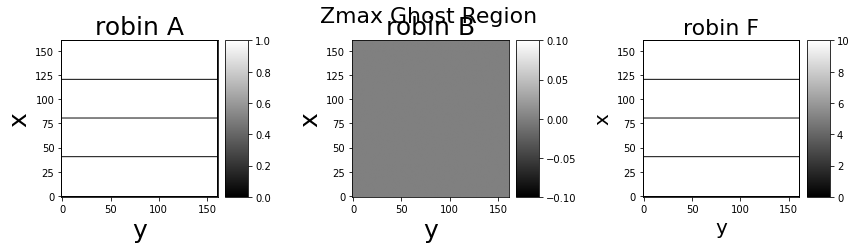

In [139]:
robinA=data[0]['robinA']
robinB=data[0]['robinB']
robinF=data[0]['robinF']

plot_robin('Zmin Ghost Region', 0.63,'y', 'x', 
           robinA[:,:,0],
           robinB[:,:,0],
           robinF[:,:,0], 
           extent_Z)

plot_robin('Zmax Ghost Region', 0.63,'y', 'x', 
           robinA[:,:,ncells[2]+1],
           robinB[:,:,ncells[2]+1],
           robinF[:,:,ncells[2]+1], 
           extent_Z)

# plot_robin('Ymin Ghost Region',0.75, 'z', 'x',
#            robinA[:,0,:],
#            robinB[:,0,:],
#            robinF[:,0,:], 
#            extent_Y)

# plot_robin('Ymax Ghost Region',0.75, 'z', 'x',
#            robinA[:,ncells[1]+1,:],
#            robinB[:,ncells[1]+1,:],
#            robinF[:,ncells[1]+1,:], 
#            extent_Y)



In [140]:
def plot_soln(title, title_height, hor_label, ver_label, min_slice, max_slice, extent):
   
    fig, (ax1,ax2) = plt.subplots(figsize=(12, 12), ncols=2)
    im1 = ax1.imshow(min_slice,cmap ='gray',vmin=min_slice.min(), vmax=min_slice.max(),extent=extent)
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="15%", pad=0.1)
    plt.colorbar(im1, cax=cax)
    ax1.set_xlabel(hor_label, fontsize=25)
    ax1.set_ylabel(ver_label, fontsize=25)
    ax1.set_title('min', fontsize=25)

    im2 = ax2.imshow(max_slice,cmap ='gray',vmin=max_slice.min(), vmax=max_slice.max(),extent=extent)
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="15%", pad=0.1)
    plt.colorbar(im2, cax=cax)
    ax2.set_xlabel(hor_label, fontsize=25)
    ax2.set_ylabel(ver_label, fontsize=25)
    ax2.set_title('max', fontsize=25)

    fig.tight_layout()
    fig.suptitle(title,y=title_height,fontsize=22)
    #plt.subplots_adjust(bottom=0.1)
    plt.show()

(162, 162, 42)


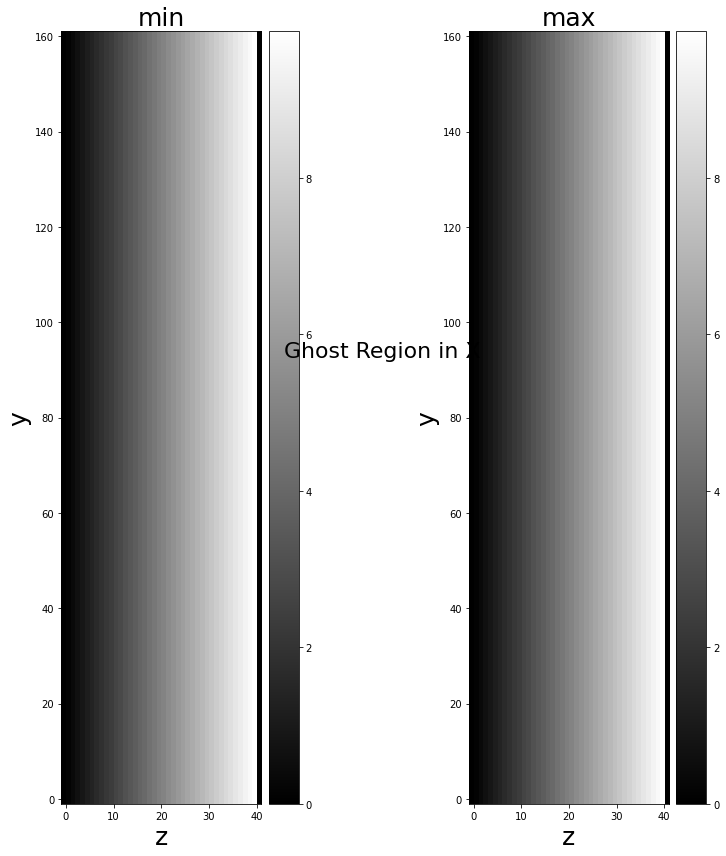

In [141]:
phi=data[0]['phi']
print(phi.shape)
plot_soln('Ghost Region in X',0.6, 'z', 'y',
           phi[0,:,:],
           phi[ncells[0]+1,:,:],
           extent_X)

plot_soln('Ghost Region in Y',0.6, 'z', 'x',
           phi[:,0,:],
           phi[:,ncells[1]+1,:],
           extent_Y)

plot_soln('Ghost Region in Z', 0.65,'y', 'x',
           phi[:,:,0],
           phi[:,:,ncells[2]+1],
           extent_Z)

